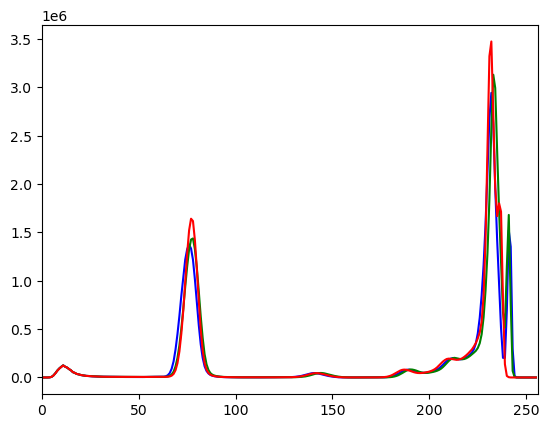

In [3]:
#Generate BGR histogram

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\jenny.kim-es\\Desktop\\Photo\\2024_02_27\\Spectralon_99%\\IMG_0005_99%_70%CFL.tif')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

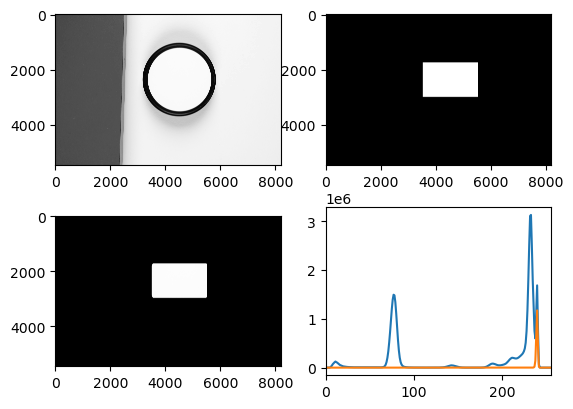

In [10]:
#Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

img = cv.imread('C:\\Users\\jenny.kim-es\\Desktop\\Photo\\2024_02_27\\Spectralon_99%\\IMG_0005_99%_70%CFL.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[1750:3000, 3500:5500] = 255 #[y,x]
masked_img = cv.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()